In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import yfinance as yf

In [101]:
start = datetime.datetime(2020, 11, 1)
end = datetime.datetime(2023, 11,1)

df = yf.download('UPS', start , end)

[*********************100%%**********************]  1 of 1 completed


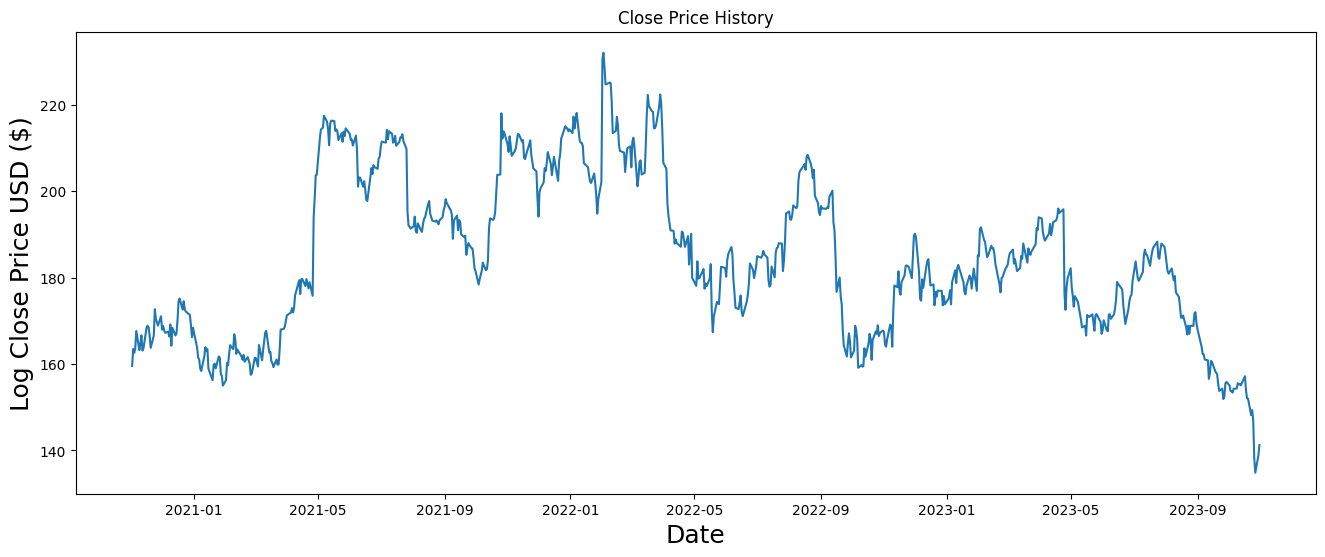

In [102]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Log Close Price USD ($)', fontsize=18)
plt.show()

In [103]:
df.filter(['Close']).values

array([[159.55000305],
       [163.47999573],
       [162.58000183],
       [163.55999756],
       [167.67999268],
       [163.22000122],
       [164.72999573],
       [166.63999939],
       [163.11000061],
       [163.66999817],
       [168.44000244],
       [168.88000488],
       [168.44999695],
       [166.47999573],
       [163.75999451],
       [166.6000061 ],
       [172.69000244],
       [170.5       ],
       [168.88999939],
       [171.07000732],
       [167.96000671],
       [168.83000183],
       [167.83000183],
       [167.25      ],
       [167.47000122],
       [166.38999939],
       [169.17999268],
       [164.24000549],
       [168.3999939 ],
       [166.61999512],
       [167.16999817],
       [170.13000488],
       [174.49000549],
       [175.17999268],
       [172.58999634],
       [174.55999756],
       [172.63999939],
       [172.19000244],
       [171.36000061],
       [169.02999878],
       [166.22999573],
       [168.3999939 ],
       [163.80000305],
       [161

In [104]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

604

In [105]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.25411186],
       [0.29451063],
       [0.28525905],
       [0.29533302],
       [0.33768494],
       [0.29183799],
       [0.30736014],
       [0.32699422],
       [0.29070723],
       [0.29646378],
       [0.34549754],
       [0.35002059],
       [0.34560028],
       [0.32534945],
       [0.29738891],
       [0.32658311],
       [0.38918587],
       [0.36667351],
       [0.35012333],
       [0.37253296],
       [0.34056338],
       [0.34950658],
       [0.33922698],
       [0.33326479],
       [0.33552631],
       [0.32442432],
       [0.35310435],
       [0.30232323],
       [0.34508627],
       [0.32678859],
       [0.3324424 ],
       [0.3628701 ],
       [0.40768919],
       [0.41478198],
       [0.38815784],
       [0.40840868],
       [0.38867185],
       [0.38404606],
       [0.37551397],
       [0.35156247],
       [0.32277955],
       [0.34508627],
       [0.29780018],
       [0.27436269],
       [0.26942837],
       [0.24845804],
       [0.24218748],
       [0.277

In [106]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(15, len(train_data)):
    x_train.append(train_data[i-15:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 16:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.25411186, 0.29451063, 0.28525905, 0.29533302, 0.33768494,
       0.29183799, 0.30736014, 0.32699422, 0.29070723, 0.29646378,
       0.34549754, 0.35002059, 0.34560028, 0.32534945, 0.29738891])]
[0.326583107227816]

[array([0.25411186, 0.29451063, 0.28525905, 0.29533302, 0.33768494,
       0.29183799, 0.30736014, 0.32699422, 0.29070723, 0.29646378,
       0.34549754, 0.35002059, 0.34560028, 0.32534945, 0.29738891]), array([0.29451063, 0.28525905, 0.29533302, 0.33768494, 0.29183799,
       0.30736014, 0.32699422, 0.29070723, 0.29646378, 0.34549754,
       0.35002059, 0.34560028, 0.32534945, 0.29738891, 0.32658311])]
[0.326583107227816, 0.38918586642097]



In [113]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(x_train.shape[1], 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm = model.fit(x_train, y_train, batch_size=256, epochs=1000, verbose=2)
lstm

Epoch 1/1000
3/3 - 2s - loss: 0.4168 - 2s/epoch - 784ms/step
Epoch 2/1000
3/3 - 0s - loss: 0.3931 - 36ms/epoch - 12ms/step
Epoch 3/1000
3/3 - 0s - loss: 0.3708 - 33ms/epoch - 11ms/step
Epoch 4/1000
3/3 - 0s - loss: 0.3497 - 31ms/epoch - 10ms/step
Epoch 5/1000
3/3 - 0s - loss: 0.3295 - 30ms/epoch - 10ms/step
Epoch 6/1000
3/3 - 0s - loss: 0.3110 - 31ms/epoch - 10ms/step
Epoch 7/1000
3/3 - 0s - loss: 0.2935 - 33ms/epoch - 11ms/step
Epoch 8/1000
3/3 - 0s - loss: 0.2768 - 31ms/epoch - 10ms/step
Epoch 9/1000
3/3 - 0s - loss: 0.2613 - 33ms/epoch - 11ms/step
Epoch 10/1000
3/3 - 0s - loss: 0.2469 - 32ms/epoch - 11ms/step
Epoch 11/1000
3/3 - 0s - loss: 0.2331 - 32ms/epoch - 11ms/step
Epoch 12/1000
3/3 - 0s - loss: 0.2205 - 31ms/epoch - 10ms/step
Epoch 13/1000
3/3 - 0s - loss: 0.2083 - 32ms/epoch - 11ms/step
Epoch 14/1000
3/3 - 0s - loss: 0.1970 - 35ms/epoch - 12ms/step
Epoch 15/1000
3/3 - 0s - loss: 0.1863 - 31ms/epoch - 10ms/step
Epoch 16/1000
3/3 - 0s - loss: 0.1763 - 31ms/epoch - 10ms/step
Ep

In [114]:
# Create the testing data set
test_data = scaled_data[training_data_len - 15: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(15, len(test_data)):
    x_test.append(test_data[i-15:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 0s 3ms/step


3.5502574609206667

<ipython-input-120-316a7779cbcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


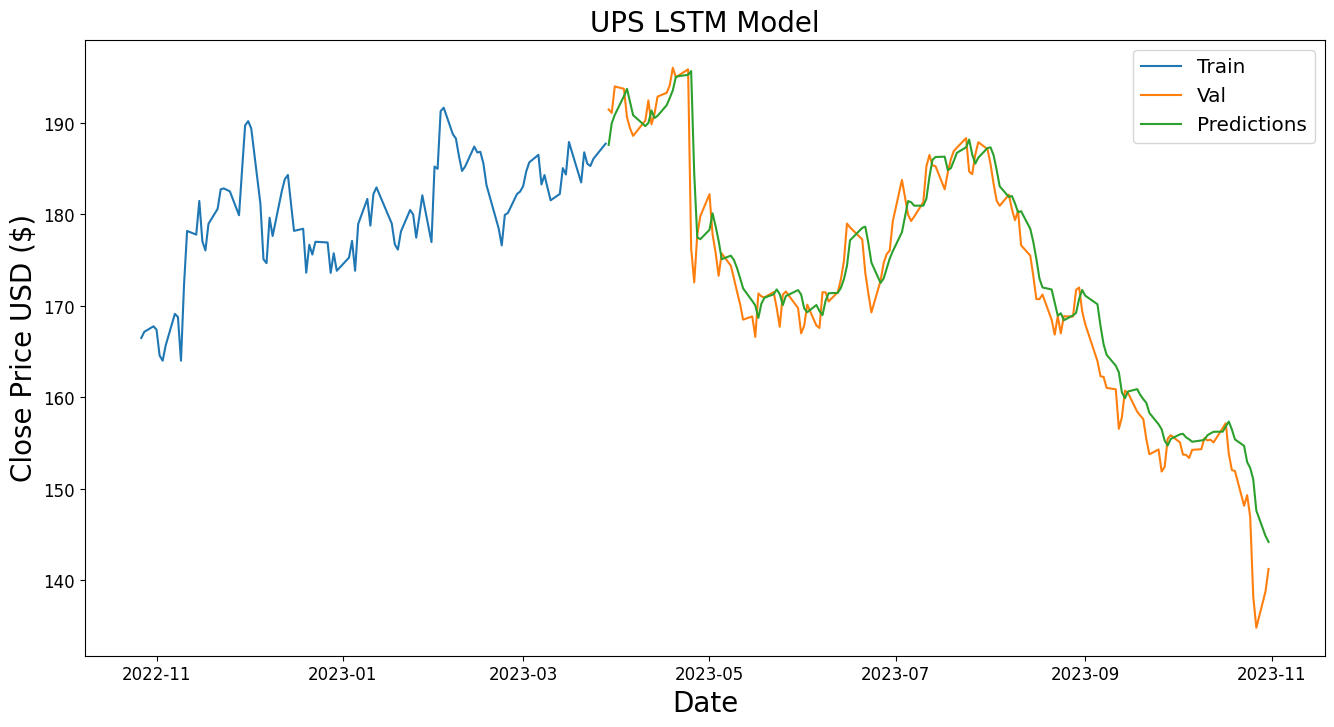

In [120]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('UPS LSTM Model',fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(train['Close'][500:])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right',fontsize = 'x-large')
plt.show()

Text(0, 0.5, 'MSE')

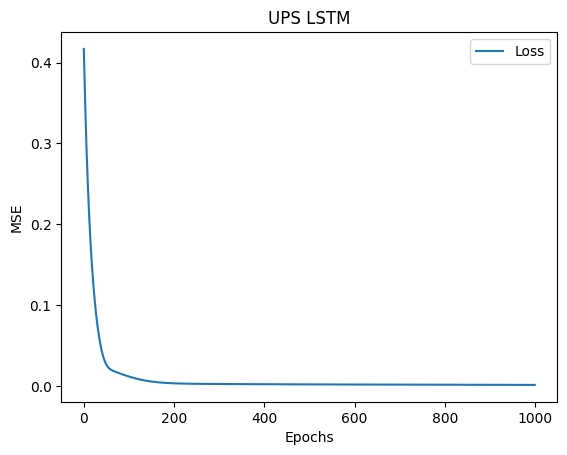

In [121]:
plt.plot(lstm.history['loss'], label='Loss')
plt.legend(loc='best')
plt.title('UPS LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [117]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 4)                 96        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
